In [3]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
x_train = x_train/255
x_test = x_test/255

In [17]:
y_train = to_categorical(y_train, num_classes =10)

In [23]:
y_test = to_categorical(y_test, num_classes =10)

In [18]:
y_train.shape

(60000, 10)

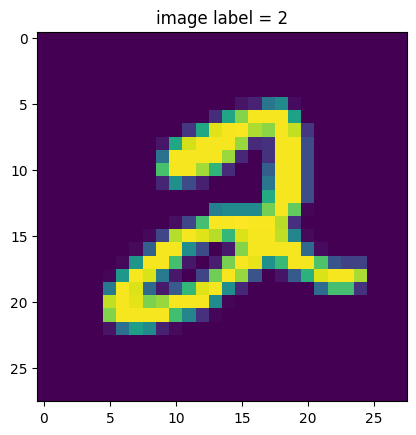

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [10]:
model = Sequential([
    Flatten(input_shape = (28,28)), #input layer = 28*28 = 784
    Dense(5, activation='relu'), #hidden layer 5 neurons
    Dense(10, activation='softmax') # output layer with 10 neurons
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │           3,925 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.fit(x_train,y_train,epochs = 5, batch_size = 32,verbose=2)

Epoch 1/5
1875/1875 - 3s - 2ms/step - accuracy: 0.7502 - loss: 0.8231
Epoch 2/5
1875/1875 - 2s - 1ms/step - accuracy: 0.8419 - loss: 0.5311
Epoch 3/5
1875/1875 - 3s - 1ms/step - accuracy: 0.8570 - loss: 0.4813
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8679 - loss: 0.4481
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8767 - loss: 0.4203


In [24]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.4581


[0.410415917634964, 0.8794999718666077]

In [25]:
model.save('mnist.h5')

In [27]:
from keras.models import Model
from keras.layers import Input, Flatten , Dense , concatenate

In [28]:
input_layer = Input(shape=(28,28))

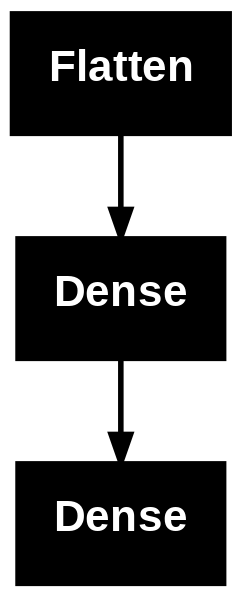

In [30]:
from keras.utils import plot_model

plot_model(model)

In [41]:
import numpy as np
prediction = model.predict(x_test[9].reshape(1, 28, 28))
predicted_digit = np.argmax(prediction)
print(f"Predicted digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted digit: 9


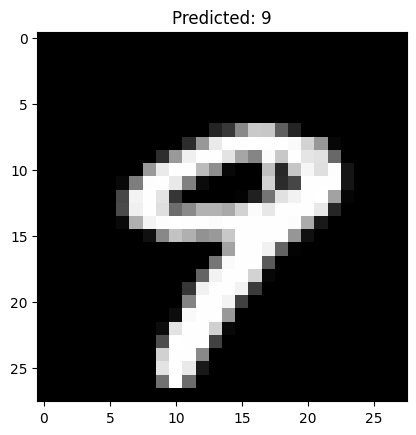

In [42]:
import matplotlib.pyplot as plt
plt.imshow(x_test[9], cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.show()